# With this dataset I wanted to create graphs for the number of accidents on German roads

## data from: https://www-genesis.destatis.de/

The data shows the absolut number of accidents on german roads divided into 4 main categories and 3 subcategories for every year of 2008 up to 2018. Additionally there is a total per main category and a total per subcategory and a total total per year. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("unfaelle08_18.csv", engine = 'python', skipfooter = 3, sep=None, skiprows=6, encoding = "ISO-8859-1")

print(df.head(5))

                                     Unnamed: 0                   Unnamed: 1  \
0                   Unfälle mit Personenschaden                    innerorts   
1                   Unfälle mit Personenschaden  außerorts (ohne Autobahnen)   
2                   Unfälle mit Personenschaden               auf Autobahnen   
3                   Unfälle mit Personenschaden                    Insgesamt   
4  Schwerwiegende Unfälle mit Sachschaden i.e.S                    innerorts   

     2008    2009    2010    2011    2012    2013    2014    2015    2016  \
0  221306  213361  195833  210427  206696  199650  209618  209821  211686   
1   81039   79051   73635   77549   75094   73003   73916   75725   75266   
2   18269   18394   18829   18290   17847   18452   18901   20113   21193   
3  320614  310806  288297  306266  299637  291105  302435  305659  308145   
4   53730   51601   51388   48435   48571   47582   42192   40709   42168   

     2017    2018  
0  207562  213124  
1   74166   7506

I had a problem reading the file. I think it was because of the German umlauts. I had to ecode it with ISO-8859-1.

## Renaming categories

I want to rename the categories and subcategories to avoid mistakes in my code

The main categories are: 

| German | English | New category |
| --- | --- | --- |
| Unfälle mit Personenschaden | Accidents with damage to people | cat_1 |
| Schwerwiegende Unfälle mit Sachschaden i.e.S | Severe accidents with property damage | cat_2 |
| Sonst. Unfälle unter dem Einfluss berausch. Mittel | Accidents under the influence | cat_3 |
| Übrige Sachschadensunfälle | Other accidents with property damage | cat_4 |

Subcategories are:

| German | English | New category |
| --- | --- | --- |
| innerorts | urban road | subc_1 |
| außerorts (ohne Autobahnen) | rural road | subc_2 |
| auf Autobahnen | highway | subc_3 |

In [2]:
# rename unnamed columns first:

df = df.rename(columns = {'Unnamed: 0': "acc_type", 'Unnamed: 1': "acc_loc"})

# now rename categories:

df = df.replace('Unfälle mit Personenschaden', "cat_1")
df = df.replace('Schwerwiegende Unfälle mit Sachschaden i.e.S', "cat_2")
df = df.replace('Sonst. Unfälle unter dem Einfluss berausch. Mittel', "cat_3")
df = df.replace('Übrige Sachschadensunfälle', "cat_4")

# rename subcategories

df = df.replace('innerorts', "subc_1")
df = df.replace('außerorts (ohne Autobahnen)', "subc_2")
df = df.replace('auf Autobahnen', "subc_3")
df = df.replace('Insgesamt', "total")

# tidy data

df = pd.melt(df, id_vars=["acc_type","acc_loc"])


print(df.head(5))

  acc_type acc_loc variable   value
0    cat_1  subc_1     2008  221306
1    cat_1  subc_2     2008   81039
2    cat_1  subc_3     2008   18269
3    cat_1   total     2008  320614
4    cat_2  subc_1     2008   53730


Check columns for datatypes:

In [3]:
print(df.dtypes)

acc_type    object
acc_loc     object
variable    object
value        int64
dtype: object


Datatype for the values already are integers. Let's create a graph

# Stacked bar graphs of total accidents per location per year

I want to create stacked bar graphs that shows the total accidents per road type per year and also the total of accidents per year  

C:\Users\obenlinks\miniconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


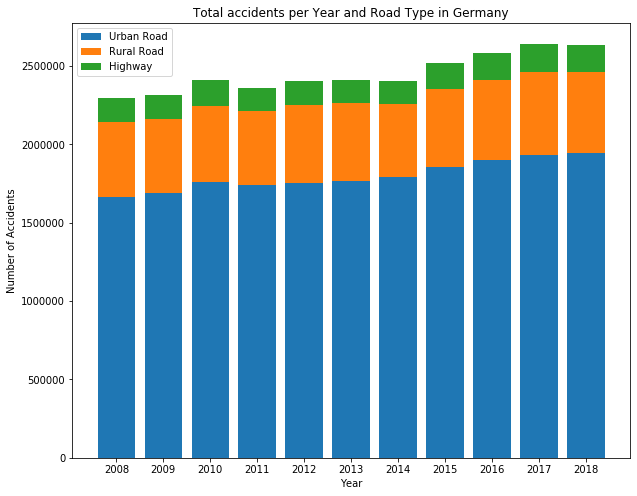

In [4]:
labels = df['variable'].unique()
x = range(len(labels))

## create total accidents per year for every category. reset_index() to be able to add values of different columns for bottom of the stack.

t_subc_1 = df[(df['acc_type'] == 'total') & (df['acc_loc'] == 'subc_1')].reset_index()
t_subc_2 = df[(df['acc_type'] == 'total') & (df['acc_loc'] == 'subc_2')].reset_index()
t_subc_3 = df[(df['acc_type'] == 'total') & (df['acc_loc'] == 'subc_3')].reset_index()

# bottom of total subcategory 3
b_subc_3 = np.add(t_subc_1['value'], t_subc_2['value'])


plt.figure(figsize=[10,8])
plt.bar(x, t_subc_1.value, label = 'Urban Road')
plt.bar(x, t_subc_2.value, bottom = t_subc_1.value, label = 'Rural Road')
plt.bar(x, t_subc_3.value, bottom = b_subc_3, label = 'Highway')

ax = plt.subplot()
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.title('Total accidents per Year and Road Type in Germany')
plt.ylabel('Number of Accidents')
plt.xlabel('Year')
plt.legend()
plt.show()

We can see that by far most accidents happen on urban roads and the total accidents per year are on a slightly upward trend. The fewest accidents happen on highways.


## Pie chart for percentage of total accidents from 2008-2018

Text(0.5, 1.0, 'percentage of Accidents from 2008 - 2018 Divided by Road Type')

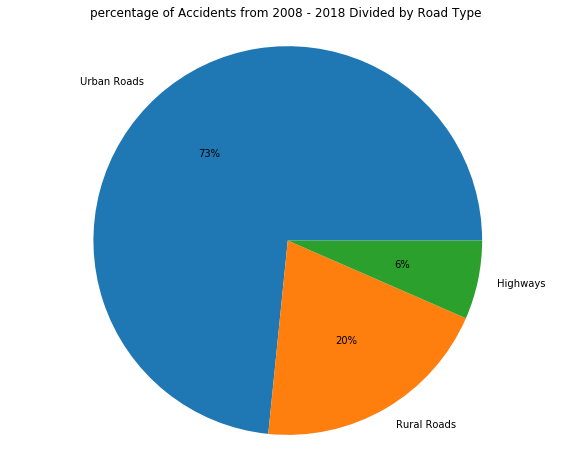

In [5]:
pie_labels = ['Urban Roads', 'Rural Roads', 'Highways']
pie_num = [t_subc_1.value.sum(), t_subc_2.value.sum(), t_subc_3.value.sum()]

plt.figure(figsize=[10, 8])
plt.pie(pie_num, labels = pie_labels, autopct= '%d%%')
plt.axis('equal')
plt.title('percentage of Accidents from 2008 - 2018 Divided by Road Type')

Every slice of the pie chart represents the percentage of the accumulated number of accidents per road type from 2008 - 2018. 73% of accidents from 2008 - 2018 happened on urban roads, 20% on rural roads and 6% on highways. 

## Create side by side bar graphs for accident type by road type

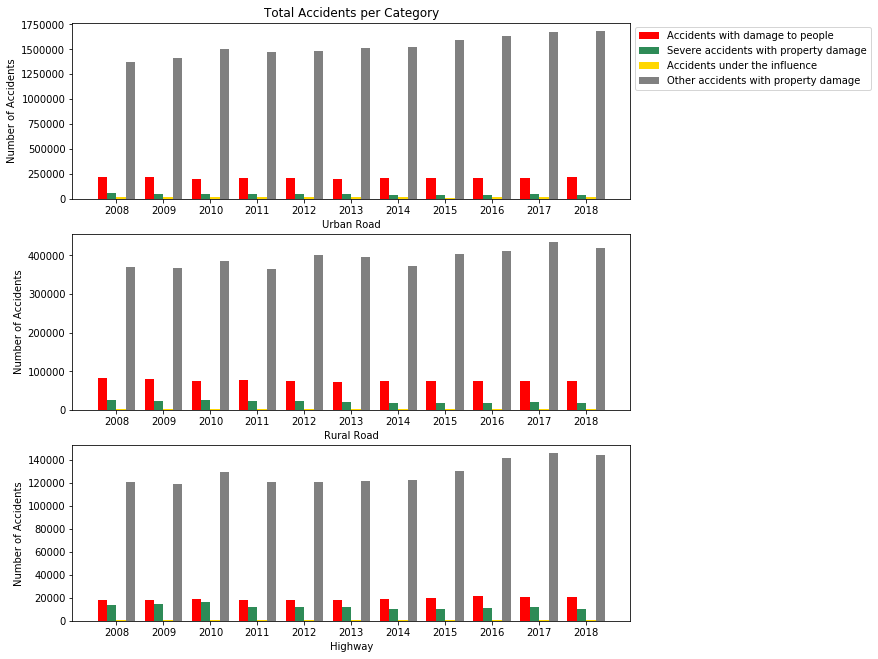

In [6]:
y_c1_s1 = df[(df['acc_type'] == 'cat_1') & (df['acc_loc'] == 'subc_1')]['value']
y_c2_s1 = df[(df['acc_type'] == 'cat_2') & (df['acc_loc'] == 'subc_1')]['value']
y_c3_s1 = df[(df['acc_type'] == 'cat_3') & (df['acc_loc'] == 'subc_1')]['value']
y_c4_s1 = df[(df['acc_type'] == 'cat_4') & (df['acc_loc'] == 'subc_1')]['value']

y_c1_s2 = df[(df['acc_type'] == 'cat_1') & (df['acc_loc'] == 'subc_2')]['value']
y_c2_s2 = df[(df['acc_type'] == 'cat_2') & (df['acc_loc'] == 'subc_2')]['value']
y_c3_s2 = df[(df['acc_type'] == 'cat_3') & (df['acc_loc'] == 'subc_2')]['value']
y_c4_s2 = df[(df['acc_type'] == 'cat_4') & (df['acc_loc'] == 'subc_2')]['value']

y_c1_s3 = df[(df['acc_type'] == 'cat_1') & (df['acc_loc'] == 'subc_3')]['value']
y_c2_s3 = df[(df['acc_type'] == 'cat_2') & (df['acc_loc'] == 'subc_3')]['value']
y_c3_s3 = df[(df['acc_type'] == 'cat_3') & (df['acc_loc'] == 'subc_3')]['value']
y_c4_s3 = df[(df['acc_type'] == 'cat_4') & (df['acc_loc'] == 'subc_3')]['value']


# define easy function to create x slots for the bar graph: 
# t = amount of categories (in this case 4, cat_1 to cat_4)
# w = bar width (standard = 0.8)
# n = position of category (1 for cat_1, 2 for cat_2, etc...) 
# d = total amount of comparisions (in this case 11, 1 for every year)

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]


# create x-slots for categories

x_c1 = create_x(4, 0.8, 1, 11)
x_c2 = create_x(4, 0.8, 2, 11)
x_c3 = create_x(4, 0.8, 3, 11)
x_c4 = create_x(4, 0.8, 4, 11)

# create x slot for year label

middle_x = create_x(4,2,1,11)

#create plot



plt.figure(figsize=[10,11])

# Urban Roads
# blue, orange, green

ax = plt.subplot(3, 1, 1)
plt.bar(x_c1, y_c1_s1, label = "Accidents with damage to people", color = "red")
plt.bar(x_c2, y_c2_s1, label = "Severe accidents with property damage", color = "seagreen")
plt.bar(x_c3, y_c3_s1, label = "Accidents under the influence", color = "gold")
plt.bar(x_c4, y_c4_s1, label = "Other accidents with property damage", color = "grey")
ax.set_xticks(middle_x)
ax.set_xticklabels(labels)
plt.title('Total Accidents per Category')
plt.xlabel('Urban Road')
plt.ylabel('Number of Accidents')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))

# Rural Roads

ay = plt.subplot(3, 1, 2)
plt.bar(x_c1, y_c1_s2, label = "Accidents with damage to people", color = "red")
plt.bar(x_c2, y_c2_s2, label = "Severe accidents with property damage", color = "seagreen")
plt.bar(x_c3, y_c3_s2, label = "Accidents under the influence", color = "gold")
plt.bar(x_c4, y_c4_s2, label = "Other accidents with property damage", color = "grey")
ay.set_xticks(middle_x)
ay.set_xticklabels(labels)
plt.xlabel('Rural Road')
plt.ylabel('Number of Accidents')

# Highway

az = plt.subplot(3, 1, 3)
plt.bar(x_c1, y_c1_s3, label = "Accidents with damage to people", color = "red")
plt.bar(x_c2, y_c2_s3, label = "Severe accidents with property damage", color = "seagreen")
plt.bar(x_c3, y_c3_s3, label = "Accidents under the influence", color = "gold")
plt.bar(x_c4, y_c4_s3, label = "Other accidents with property damage", color = "grey")
az.set_xticks(middle_x)
az.set_xticklabels(labels)
plt.xlabel('Highway')
plt.ylabel('Number of Accidents')

plt.show()


It looks like the number of accidents in each category is somewhat evenly distributed across road types but I want to take a closer look. 

Text(0, 0.5, 'Number of Accidents')

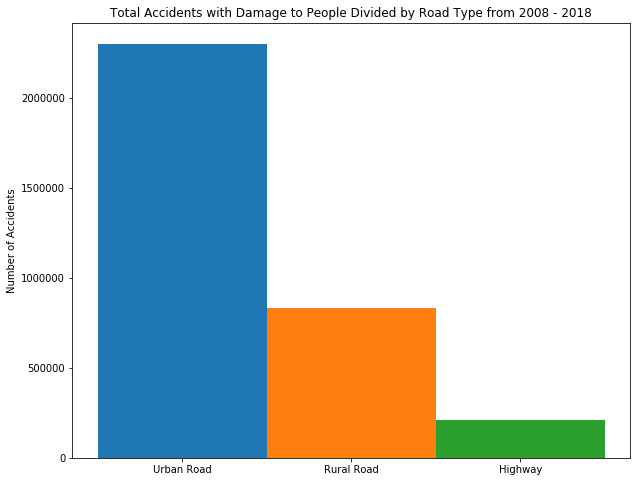

In [7]:
t_c1_s1 = df[(df['acc_type'] == 'cat_1') & (df['acc_loc'] == 'subc_1')]['value'].sum()
t_c1_s2 = df[(df['acc_type'] == 'cat_1') & (df['acc_loc'] == 'subc_2')]['value'].sum()
t_c1_s3 = df[(df['acc_type'] == 'cat_1') & (df['acc_loc'] == 'subc_3')]['value'].sum()

lab = ['Urban Road', 'Rural Road', 'Highway']

plt.figure(figsize=[10,8])

ax = plt.subplot()
plt.bar(0, t_c1_s1)
plt.bar(0.8, t_c1_s2)
plt.bar(1.6, t_c1_s3)
ax.set_xticks([0, 0.8, 1.6])
ax.set_xticklabels(lab)
plt.title('Total Accidents with Damage to People Divided by Road Type from 2008 - 2018')
plt.ylabel('Number of Accidents')
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))



Most accidents with damage to people happen on urban roads and the least amount of accidents with damage to people happen on highways.

Note: In this data I have not analyzed anything else but the total amount of accidents in the years 2008 - 2018 so my conclusion is limited to that. I have not researched the criteria of the assignment towards categories or total amount of traffic in comparison to accidents.

The data suggests that the focus to make roads safer is heavily scewed towards highways even though most accidents in total and most accidents with damage to people happen on urban roads. 